In [115]:
library(tidyverse)
library(repr)
library(broom)
library(rvest)
options(repr.matrix.max.rows = 10) #limits output of dataframes to 10 rows

# Project Planning Stage

# Data Description:

#### Data Sources
This project will be conducted using the `players.csv` dataset.

#### Data Characteristics  
The `players.csv` represents 196 individuals with 7 features, including:
* `experience <chr>` - Player's experience
* `subscribe <lgl>` - Whether the player subscribed to a video game newsletter
* `hashedEmail <chr>` - Unique identifier for each player
* `played_hours <dbl>` - Number of hours the individual played
* `name <chr>` - First Name
* `gender <chr>` - Gender
* `age <dbl>` - Age (Years)

#### Data Summary
* `experience` is composed of 5 different labels and contains
    * 35 `Beginner`s
    * 63 `Amateur`s
    * 36 `Regular` s
    * 48 `Veteran`s
    * 14 `Pro`s
* `subscribe` is composed of 52 `TRUE` and 144 `FALSE`  
* `gender` contains
    * 124 `Male`
    * 37 `Female`
    * 15 `Non-binary`
    * 6 `Two-Spirited`
    * 2 `Agender`
    * 1 `Other`
    * 11 `Prefer not to say`
* `played_hours`
    * Maximum - 223.1 hours
    * Minimum - 0 hours
* `played_hours` Averages
    * `Beginner` - 6.0174603 Hours
    * `Amateur` - 1.2485714 Hours
    * `Regular` - 2.6000000 Hours
    * `Veteran` - 18.2083333 Hours
    * `Pro` - 0.6479167 Hours
    * Total - 5.845918 Hours
* `Age`
    * Oldest - 50 years
    * Youngest - 8 years
    * Mean - 20.52 years
#### Potential Issues
* Column `Age` contains `NA`
* Gender population of the dataset leans towards Males
* Experience of individuals within the dataset leans towards Amateur players. 

# Questions: 
#### Broad Question
We are interested in which player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  
#### Specific Question
How accurately can age, and hours played predict subscription to a game-related newsletter in `players.csv`? And how do they differ from player experience?
#### Data Sets
The `players.csv` dataframe can help us answer both our broad question and our specific question due to the data frame representing various individuals of different experience, age, hours played, and whether or not they subscribed.

# Exploratory Data Analysis and Visualization

In [119]:
url <- "https://raw.githubusercontent.com/ckwok07/DSCI100-Project-Planning-Stage-/refs/heads/main/data/players.csv"
players <- read_csv(url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


In [120]:
players_mean_values <- players |>
    group_by(experience, subscribe) |>
    summarize(played_hours_mean = mean(played_hours),
             Age = mean(Age))
players_mean_values

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,played_hours_mean,Age
<chr>,<lgl>,<dbl>,<dbl>
Amateur,FALSE,0.36666667,23.11111
Amateur,TRUE,8.27777778,19.11111
Beginner,FALSE,1.17500000,26.75000
Beginner,TRUE,1.27037037,20.14815
Pro,FALSE,0.57500000,18.00000
Pro,TRUE,3.41000000,NA
Regular,FALSE,0.02857143,23.71429
Regular,TRUE,22.59655172,NA
Veteran,FALSE,0.50666667,21.80000


The table above shows mean values for quantitative values based on experience and newsletter subscription.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


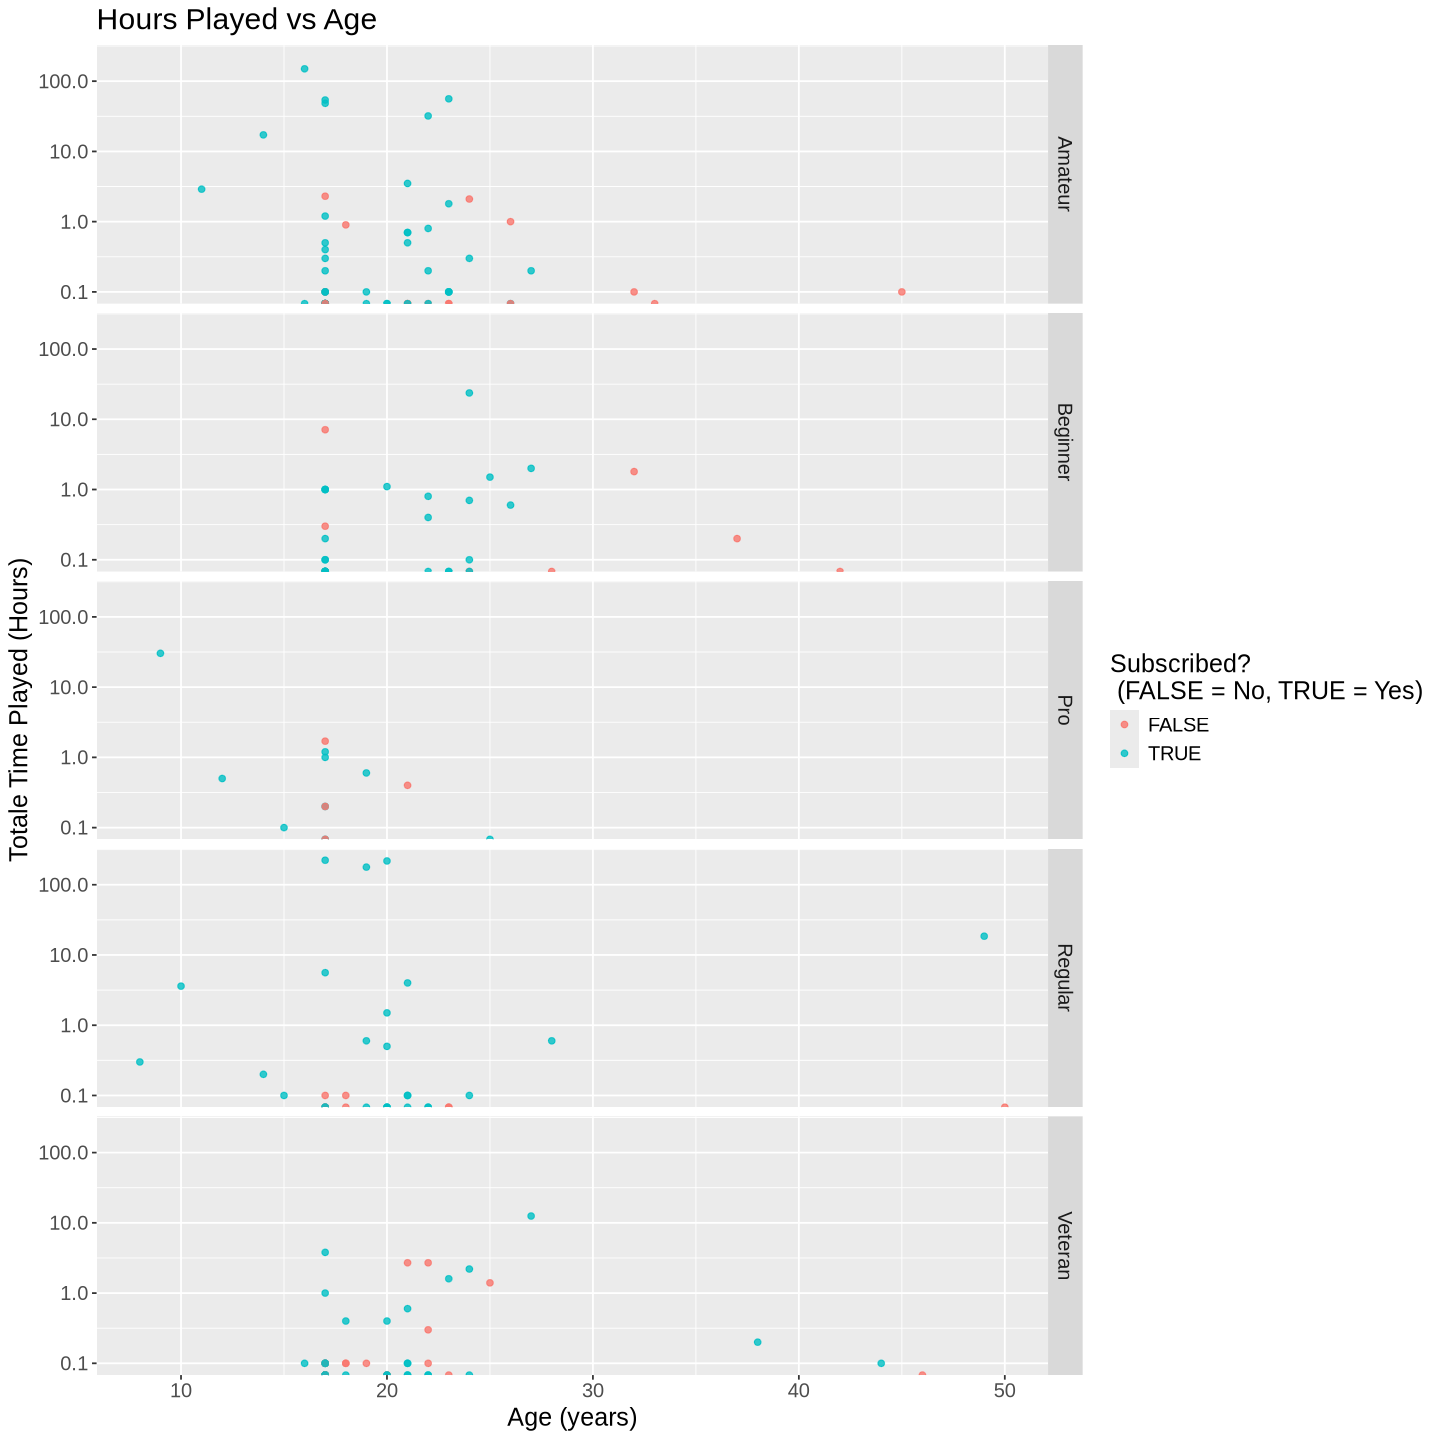

In [123]:
options(repr.plot.width = 12, repr.plot.height = 12)
players_sub_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.8) + 
    labs(title = "Hours Played vs Age", x = "Age (years)", y = "Totale Time Played (Hours)", color = "Subscribed? \n (FALSE = No, TRUE = Yes)") +
    scale_y_log10() +
    facet_grid(rows = "experience") +
    theme(text = element_text(size = 15))
players_sub_plot

The visualization above shows the relationship between hours played, age, and whether the individual subscribed to the newsletter, separated by video game experience. Visually, we can see that many individuals have 0 hours played.

# Methods and Plan

I plan to use K-nearest-neighbors classification to predict `subscribe`. KNN classification was selected because the variable we are predicting has only 2 classes and KNN makes no assumptions about data distribution. However, we must assume that individuals with similar characteristics will behave similarly in signing up for the newsletter and there is sufficient representation within the `players.csv` dataframe. Other issues may include, having multiple variables for prediction can lower the accuracy of KNN classification and since variables have different scales, those with larger magnitudes will dominate the distance metric. In order to use KNN classifaction we will first split the dataset into 70% Training and 30% Testing sets, as 70% training data provides enough data for the model to learn meaningful patterns and 30% testing data ensures evaluation without overfitting to the training set. In addition to that, scaling, tuning and cross-validation will be preformed to determine the most accurate k-value for our algorithm and ensure optimized accurancy, precision, and recall metrics.